## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [ ]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 0       9       4       1       3       

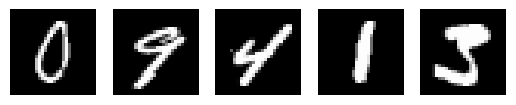

In [ ]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

In [ ]:
x_train.shape

(60000, 28, 28)

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [ ]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(x_train.shape[0],-1)                                       # flatten the images of training set
x_test_flatten = x_test.reshape(x_test.shape[0],-1)                                        # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

x_validation = x_train_flatten[:n_validation]
y_validation = y_train[:n_validation]

x_train_flatten = x_train_flatten[n_validation:]
y_train_splitted = y_train[n_validation:]


In [ ]:
x_train_flatten.shape # Verify if the validation-test split is successful

(50000, 784)

In [ ]:
x_validation.shape

(10000, 784)

In [ ]:
y_train_splitted.shape

(50000,)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_validation.shape

(10000,)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
y_train[0]

np.uint8(5)

### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [ ]:
model = keras.models.Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [ ]:
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience = 10
)

In [ ]:
model.compile(optimizer="Adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

n_epochs = 100              # set number of epochs
batch_size = 512            # you can tweak with these parametrs
history = model.fit(x=x_train,y=y_train,epochs=n_epochs,validation_split=0.1,batch_size=batch_size,callbacks=[early_stop])

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.6547 - loss: 5.6885 - val_accuracy: 0.9660 - val_loss: 0.1205
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9628 - loss: 0.1258 - val_accuracy: 0.9775 - val_loss: 0.0809
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9800 - loss: 0.0653 - val_accuracy: 0.9810 - val_loss: 0.0610
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9865 - loss: 0.0425 - val_accuracy: 0.9827 - val_loss: 0.0592
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9911 - loss: 0.0295 - val_accuracy: 0.9853 - val_loss: 0.0573
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9944 - loss: 0.0194 - val_accuracy: 0.9865 - val_loss: 0.0518
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9968 - loss: 0.0131 - val_accuracy: 0.9855 - val_loss: 0.0562
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9972 - loss: 0.0111 - val_a

In [ ]:
history.history

{'accuracy': [0.8329444527626038,
  0.9673148393630981,
  0.9810370206832886,
  0.9870185256004333,
  0.9909999966621399,
  0.9941666722297668,
  0.9963148236274719,
  0.9969444274902344,
  0.9980185031890869,
  0.9987592697143555,
  0.9991852045059204,
  0.9996481537818909,
  0.9997962713241577,
  0.999833345413208,
  0.9999814629554749,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.7862005233764648,
  0.11005735397338867,
  0.06278327852487564,
  0.04153893515467644,
  0.029207035899162292,
  0.020237520337104797,
  0.014115220867097378,
  0.01096705999225378,
  0.008122668601572514,
  0.005861579440534115,
  0.004153487738221884,
  0.0027727612759917974,
  0.0019174314802512527,
  0.001402513007633388,
  0.0008526906603947282,
  0.0005679691676050425,
  0.0004284452588763088,
  0.0003510017413645983,
  0.00029901007656008005,
  0.0002650046953931451,

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9858 - loss: 0.0759
Loss =  0.058784693479537964
Accuracy =  98.87999892234802 %


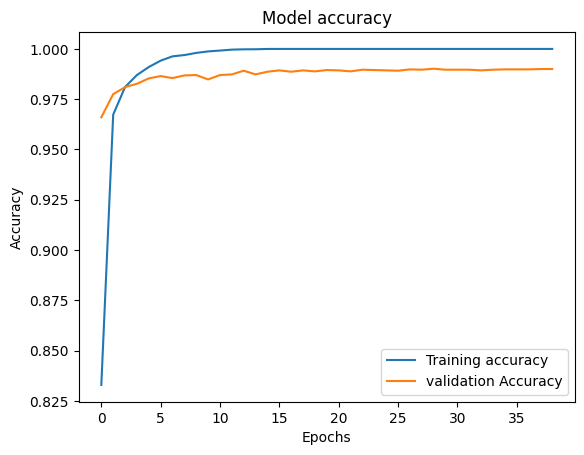

In [ ]:
results = model.evaluate(x=x_test,y=y_test)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")


# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

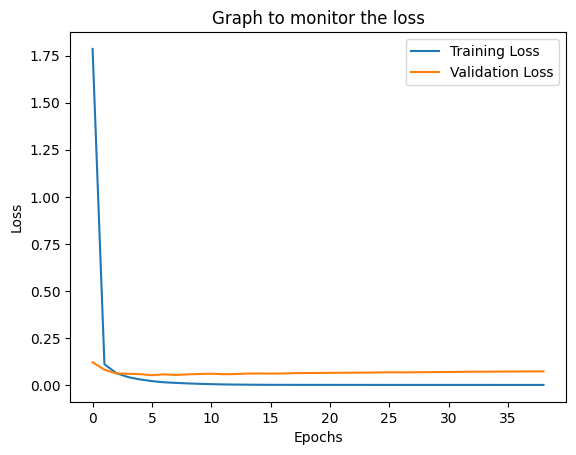

In [ ]:
# Similarly write code to plot loss...
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'],label="Validation Loss")
plt.title("Graph to monitor the loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
x_test[0].shape

(28, 28)

Lets show our results on images from testing dataset

image: 


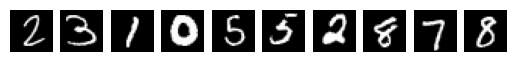

Predicted value: 
2       3       1       0       5       5       2       8       7       8       

In [ ]:
n = 10   # = no. of images to see predictions on

index = np.random.choice(len(x_test),n)  # choose random index from test data
print("image: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind],cmap="gray")             # fill code to show images from test set
    plt.axis("off")
    #print(y_test[ind],end="       ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i,ind in enumerate(index):
  prob = model.predict(x_test[ind].reshape(1,28,28,1),verbose=0)
  digit = np.argmax(prob)
  print(digit, end="       ")